Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Bioinformatika 1

### 1. Čitanje podataka

JELEN 5-6 =  12.0 Number of alignments: 24192
JELEN 6-7 =  22.0 Number of alignments: 2523156480
JELEN 5-7 =  24.0 Number of alignments: 17557585920


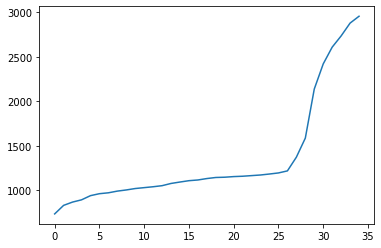

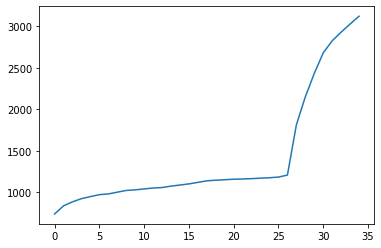

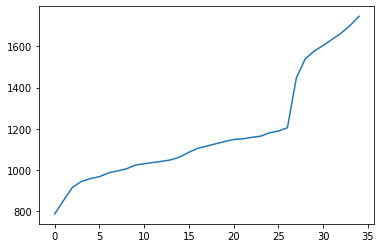

In [84]:
import os
from Bio import SeqIO
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J29_B_CE_IonXpress_005.fastq")


expected = list(SeqIO.parse(path, "fasta"))
    
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 1
aligner.mismatch_score = -1


alignments = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-alignments[0].score, "Number of alignments: %d" % len(alignments))
alignments = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-alignments[0].score, "Number of alignments: %d" % len(alignments))
alignments = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-alignments[0].score, "Number of alignments: %d" % len(alignments))

data = list(SeqIO.parse(pathFASTQ, "fastq"))



import matplotlib.pyplot as plt

for i in range(3):
    readings=[0] * 35

    for sequence in data:
        alignments = aligner.align(expected[i].seq,sequence.seq)
        distance= int(len(sequence.seq)-alignments[0].score)
        for k in range(35):
            if distance <=k:
                readings[k]+=1
    plt.subplots()
    plt.plot(readings)
    
    
